#### [ Fish 길이에 따른 무게 예측 ]
- 데이터셋 : fish.csv
- 학습종류 : 지도학습 / 회귀(Regression) 
- 알고리즘 : 분석 후 결정 
- 피쳐 : 길이 Length
- 타겟 : 무게 Weight

[1] 모듈 로딩 및 데이터 준비 <hr>

In [23]:
## [1-1] 모듈 로딩
import pandas as pd                                     ## 데이터 분석 및 전처리용
import matplotlib.pyplot as plt                         ## 데이터 시각화
from sklearn.model_selection import train_test_split    ## 데이터셋 분리용 모듈

In [24]:
## [1-2] 데이터 준비
DATA_FILE = '../data/fish.csv'

In [25]:
## - 데이터 로딩
## - 농어 생선의 무게와 길이 
fishDF = pd.read_csv(DATA_FILE, header=None, 
                     skiprows=73, skipfooter=31, 
                     usecols=[1,2], engine='python')
fishDF.head()

,1,2
0,5.9,8.4
1,32.0,13.7
2,40.0,15.0
3,51.5,16.2
4,70.0,17.4


[2] 데이터 분석 - 탐색적 분석<hr>

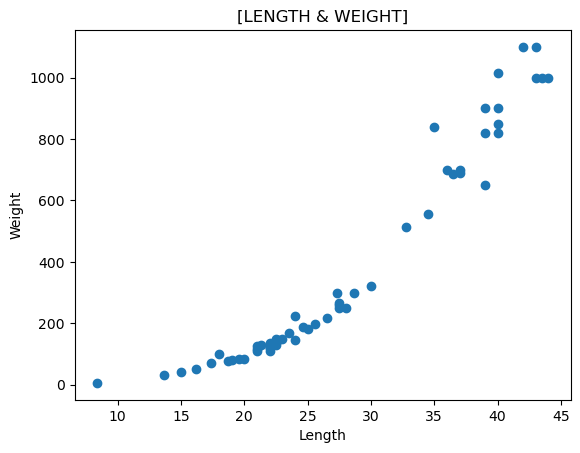

In [26]:
## 시각화 
## 1번 컬럼 =>  Weight,  2번 컬럼 => Length
plt.plot(fishDF[2], fishDF[1], 'o')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.title('[LENGTH & WEIGHT]')
plt.show()

- 탐색적 분석 결과
    * 길이가 비슷하면 무게도 비슷함
    * 비슷한 데이터끼리 모여 있음
    * 알고리즘 : 최근접이웃 회귀 진행

[3] 데이터 셋 준비<hr>
- 피쳐와 타겟 분리
- 학습용/검증용/테스트용 데이터셋 분리 ==> 학습용과 테스트용으로만 분리

In [27]:
fishDF.columns[-1:]

Index([2], dtype='int64')

In [28]:
fishDF.columns

Index([1, 2], dtype='int64')

In [29]:
## [3-1] 피쳐와 타겟 분리 ==> 피쳐는 2D, 타겟 1D
featureDF = fishDF[fishDF.columns[-1:]]
targetSR  = fishDF[fishDF.columns[0]]

print(f'featureDF => {featureDF.ndim}D  {featureDF.shape}')
print(f'targetSR => {featureDF.ndim}D  {targetSR.shape}')

featureDF => 2D  (56, 1)
targetSR => 2D  (56,)


In [30]:
## [3-2] 데이터셋 분리 => 학습용 : 테스트용 = 75%:25%
train_data, test_data, train_label, test_label = train_test_split(featureDF, targetSR,
                                                                  random_state=10)

print(f'train_data => {train_data.shape}  train_label => {train_label.shape}')
print(f'test_data => {test_data.shape}    test_label => {test_label.shape}')

train_data => (42, 1)  train_label => (42,)
test_data => (14, 1)    test_label => (14,)


In [31]:
## - 인덱스 리셋 
train_data.reset_index(drop=True, inplace=True)
train_label.reset_index(drop=True, inplace=True)

test_data.reset_index(drop=True, inplace=True)
test_label.reset_index(drop=True, inplace=True)

In [32]:
print( train_data.index,   train_label.index)
print( test_data.index,    test_label.index)

RangeIndex(start=0, stop=42, step=1) RangeIndex(start=0, stop=42, step=1)
RangeIndex(start=0, stop=14, step=1) RangeIndex(start=0, stop=14, step=1)


[4] 학습 진행 <hr>

In [33]:
## 모듈로딩
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error, mean_squared_error

In [34]:
## [4-1] 알고리즘 객체 생성
model = KNeighborsRegressor()

In [35]:
## [4-2] 학습 => 학습용데이터셋 사용 : 규칙/패턴 X 즉, 모델 없음 
model.fit(train_data, train_label)

KNeighborsRegressor()

In [36]:
## => fit 후 학습데이터 확인
print( model.n_features_in_)
print( model.n_samples_fit_)
print( model.effective_metric_)


1
42
euclidean


In [37]:
## [4-3] 훈련데이터셋으로 예측 ==> predict(2D_피쳐데이터)

## - 생성 길이에 대한 무게 예측 결과 
pre_weight = model.predict(train_data)

## - 모델 성능 평가 ==> score(2D_피쳐, 1D_타겟) : 모델 적합도
score = model.score(train_data, train_label)

## - 손실 계산 평가 ==> rmse, mse, mae....(1D_타겟, 1D_예측값)
rmse = root_mean_squared_error(train_label, pre_weight)

print(f'[TRAIN] score => {score}  rmse => {rmse}')

[TRAIN] score => 0.9784573278997548  rmse => 54.16730493396846


In [38]:
## [4-4] 테스트데이터셋으로 예측 ==> predict(2D_피쳐데이터)

## - 생성 길이에 대한 무게 예측 결과 
pre_weight = model.predict(test_data)

## - 모델 성능 평가 ==> score(2D_피쳐, 1D_타겟) : 모델 적합도
score = model.score(test_data, test_label)

## - 손실 계산 평가 ==> rmse, mse, mae....(1D_타겟, 1D_예측값)
rmse = root_mean_squared_error(test_label, pre_weight)

print(f'[TEST] score => {score}  rmse => {rmse}')

[TEST] score => 0.9557072737458564  rmse => 44.636380101565464


In [39]:
## ---------------------------------------------------------------------
## 함수기능 : 평가결과 반환 함수
## 함수이름 : checkModel
## 매개변수 : 학습용데이터셋, 테스트용데이터셋
## 함수결과 : 결과값DataFrame, 결과문자열
## ---------------------------------------------------------------------
def checkModel(trainDS, testDS, model):
    result=[]       # 성능평가 결과 저장

    for data, label in [trainDS, testDS]:
        ## - 생성 길이에 대한 무게 예측 결과 
        pre_label = model.predict(data)

        ## - 모델 성능 평가 ==> score(2D_피쳐, 1D_타겟) : 모델 적합도
        score = model.score(data, label)

        ## - 손실 계산 평가 ==> rmse, mse, mae....(1D_타겟, 1D_예측값)
        rmse = root_mean_squared_error(label, pre_label)


[5] 최근접이웃 알고리즘의 동작원리 확인 <hr>
- K개만큼 가까이 있는 데이터를 추출 
- 회귀 => K개의 값을 모두 더한 후 평균 

In [40]:
# - 데이터 지정
train_data.iloc[0] , train_label[0]

(2    19.0
 Name: 0, dtype: float64,
 np.float64(80.0))

In [41]:
##  - 이웃 찾기 : kneighbors(2D)
distance, indices = model.kneighbors([[19.0]])

## - 19.0 데이터랑 거리가 가까운 K개 즉, 5개 데이터의 2D 인덱스
print(f'distance=> {distance}\nindices => {indices}, {type(indices)}')

## -> 이웃 데이터 인덱스 2D ==> 1D
label_idx= indices.reshape(-1) 

print(f'label_idx=> {label_idx}')

distance=> [[0.  0.3 0.6 1.  1. ]]
indices => [[ 0  1 32 41 18]], <class 'numpy.ndarray'>
label_idx=> [ 0  1 32 41 18]


In [42]:
## -> 이웃 데이터의 길이와 무게 값 추출 
train_data.iloc[ label_idx ], train_label[ label_idx ] 

(       2
 0   19.0
 1   18.7
 32  19.6
 41  20.0
 18  18.0,
 0      80.0
 1      78.0
 32     85.0
 41     85.0
 18    100.0
 Name: 1, dtype: float64)

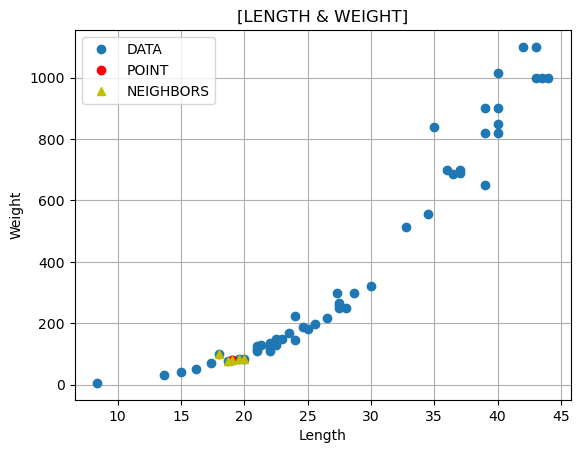

In [43]:
## 시각화  => 데이터, 포인터 데이터, 근접 이웃데이터 --------------------------------------
plt.plot(fishDF[2], fishDF[1], 'o', label='DATA')

plt.plot(train_data.iloc[0], train_label[0], 'ro', label='POINT')

plt.plot(train_data.iloc[label_idx], train_label[label_idx], 'y^', label='NEIGHBORS')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.title('[LENGTH & WEIGHT]')
plt.legend()
plt.grid()
plt.show()

In [44]:
## => 예측값 : K개 즉, 5개 이웃 데이터의 무게 Weight를 평균 낸 것으로 예측값 반환
pre_weight = train_label[ label_idx ].mean()

print(f'길이 19.0 생선의 무게는 {pre_weight}로 예측됩니다.')

길이 19.0 생선의 무게는 85.6로 예측됩니다.


In [45]:
pre_weight = model.predict([[19.0]])
print(f'길이 19.0 생선의 무게는 {pre_weight}로 예측됩니다.')

길이 19.0 생선의 무게는 [85.6]로 예측됩니다.
